In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np
%matplotlib inline


In [3]:
stocks = input("enter code of stock to download")
data = yf.download(stocks,"2008-01-01","2021-01-18")
data.head()

enter code of stock to download GC=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,878.000000,21


In [ ]:
data.shape

In [ ]:
data.info

In [24]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [7]:
#stock prediction is very unlinear hence ur algorithm might fail, be carefull with modeling

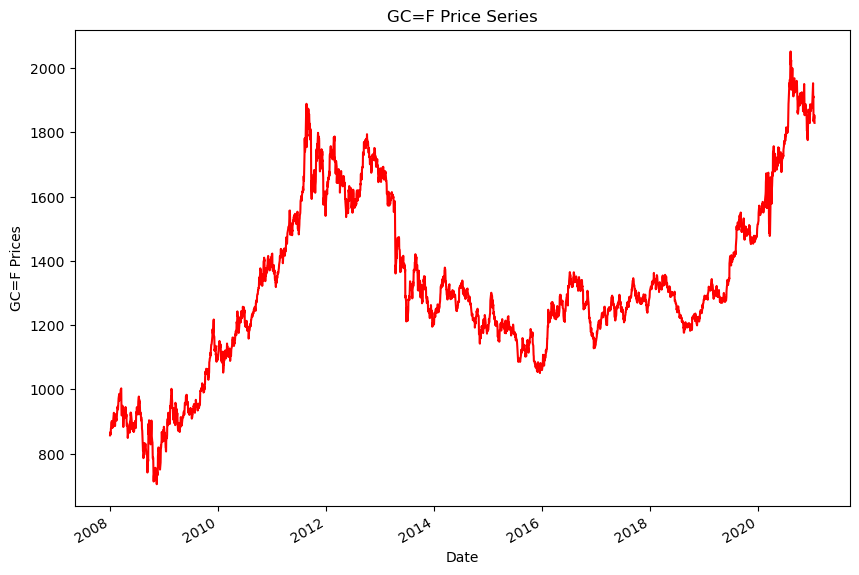

In [25]:
data.Close.plot(figsize=(10,7),color="r")
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12220\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

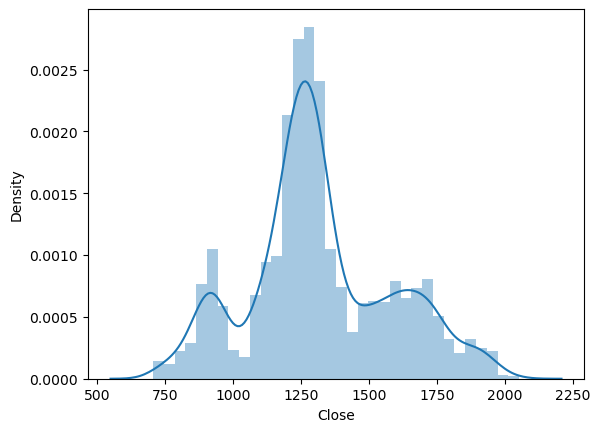

In [26]:
sns.distplot(data["Close"])

In [10]:
#stock price predicyion is a acompetitie project to work on because it is very non linear
#hence linear regression is not the best algorithm to use in this case but we will explore linear regression,
#logistic regression regularized regression and SVM in order to explore all their capabilities.

In [27]:
x = data.drop("Close", axis=1)
y = data["Close"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2624, 5)
(657, 5)
(2624,)
(657,)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction1=lr.predict(x_test)

In [29]:
prediction1

array([1728.69995117, 1093.30004883, 1259.69995117, 1107.19995117,
       1386.80004883,  901.70001221, 1250.59997559, 1290.09997559,
       1209.5       , 1898.59997559, 1155.19995117, 1921.59997559,
       1579.30004883, 1218.09997559,  955.79998779, 1721.09997559,
       1373.09997559, 1318.69995117,  934.59997559, 1326.5       ,
       1312.69995117, 1324.30004883, 1156.30004883, 1060.09997559,
       1214.19995117, 1645.5       , 1197.69995117, 1869.90002441,
       1648.69995117, 1284.19995117, 1392.59997559, 1277.69995117,
        865.40002441, 1613.40002441, 1352.30004883, 1350.19995117,
       1320.59997559, 1062.40002441, 1234.90002441, 1166.90002441,
       1366.59997559, 1187.90002441, 1290.40002441, 1490.30004883,
       1265.59997559, 1293.5       , 1226.59997559, 1183.59997559,
       1826.69995117, 1273.69995117, 1380.        , 1352.40002441,
       1330.5       , 1656.19995117, 1642.09997559, 1310.69995117,
       1104.40002441, 1239.69995117, 1279.59997559,  899.79998

In [14]:
#from the above output, the linear regression  does not fits that  well . It perfoms bad on the
#training data, as the predicted values are not correspondent to the original values
#but it might cause overfitting as there are a large number of features
#we can the check the accuracy of the model using the following
#MSE(mean squared error)
#RMSE(the squared root of the MSE)
#r2_squaredan r2_squared value of 1.2 gives a very good model)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
def calculate_Metrics(y_test,y_pred):
    ...
   # y_test = ground truth
   # y_pred = model predicted value
    ...
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test,y_pred)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("R2_Score:",r2_scores)
    

In [32]:
    calculate_Metrics(y_test,prediction1)
    

MSE: 3.811959399644165e-24
RMSE: 1.9524239805032526e-12
R2_Score: 1.0


In [17]:
#from the above values, MSE is bad,RMSE is also bad.This is why the predicted values deviated from
#the actual values
#so we now explore our next model which is the regularized model(Lasso and Ridge)

In [33]:
from sklearn.linear_model import Lasso,Ridge
la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)
la_p = la.predict(x_test)
ri_p = ri.predict(x_test)

In [41]:
calculate_Metrics(y_test,la_p)

MSE: 10.942141473479372
RMSE: 3.3078907892310125
R2_Score: 0.9998360348053783


In [ ]:
#mse,rmse and r2_ score values are better than in linear regression

In [40]:
calculate_Metrics(y_test,ri_p)

MSE: 5.717316325824151e-09
RMSE: 7.561293755584524e-05
R2_Score: 0.9999999999999143


In [ ]:
#the values obtained with regards to the ridge regression is the best amongst all 

In [21]:
#from the two above lasso and ridge regressions, they are better than the linear regression according to the metrics
#but amon the two,Lasso regression performs better than ridge so in this case, we use Lasso as our model

#We then explore SVM model. In order to use SVM model, we first tune the model to select thebest hyper parameters because
#SVM model does not work well on stock prediction problems

In [36]:
from sklearn.model_selection import GridSearchCv
from sklearn.svm import SVR
svr = SVR()
param_grid = {"c":[0.1,1,10,100,1000],
              "gamma":[1,0.1,0.01,0.001,0.0001],
              "kernel":["rbf"]}
grid = GridSearchCv(svr,param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(x_train,y_train)
              
              

ImportError: cannot import name 'GridSearchCv' from 'sklearn.model_selection' (C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\__init__.py)

In [39]:
from sklearn.svm import SVR
svr = SVR(C=10,gamma=0.001,kernel='rbf')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
print(svr_pred)


[1421.86626748 1274.40039518 1293.03112407 1282.7095889  1293.18593456
 1202.60107842 1293.03112407 1285.37923203 1238.07074175 1303.20834536
 1187.87628331 1293.03112407 1413.22646283 1217.95433954 1166.03188175
 1304.02105193 1352.49989379 1319.51800843 1125.84472705 1311.41292439
 1312.50859835 1322.95514107 1175.12837342 1246.48768442 1289.12835322
 1407.8066027  1261.00343306 1294.59496223 1378.51379553 1284.03312787
 1293.03112407 1277.23965973 1197.18476563 1293.03112407 1293.03113528
 1343.6102492  1300.74383954 1293.01997507 1240.54330761 1292.65716584
 1306.01707753 1195.34777506 1289.35744777 1402.83030356 1270.11642043
 1293.19169142 1227.85321361 1263.8655404  1293.03113837 1274.10452804
 1374.97062399 1351.67624282 1330.49110678 1293.51219192 1379.39570088
 1296.25561742 1184.71115272 1258.25078376 1287.4057991  1292.99289145
 1305.33776529 1295.9912944  1243.20909041 1323.88441177 1272.82503987
 1188.75347413 1258.58887744 1231.50285198 1170.10889602 1286.03502058
 1251.

In [ ]:
#among all the aboce explored models, you choose the one that performs well on test data which is the ridge regression model
# we now import joblib to save our chosen model

In [44]:
import joblib
joblib.dump(ri,'model.pkl')
ridge_from_joblib = chosen_model = joblib.load("model.pkl")

